In [15]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import csv
import time
import scipy.stats as st
from scipy.stats import linregress

In [16]:
## Output File (CSV)
data_file_day = "Resources/Bike_Share_Season.csv"
#Creating DataFrame
Bike_Share_Season_df=pd.read_csv(data_file_day)
Bike_Share_Season_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,cnt,Season Name
0,1,2011-01-01,1,0,1,0,0,6,0,1,16,Spring
1,2,2011-01-01,1,0,1,1,0,6,0,1,40,Spring
2,3,2011-01-01,1,0,1,2,0,6,0,1,32,Spring
3,4,2011-01-01,1,0,1,3,0,6,0,1,13,Spring
4,5,2011-01-01,1,0,1,4,0,6,0,1,1,Spring


# Time of day vs Bike Rentals

In [17]:
#Checking if the Time of the day affetcs Bike Rentals
Bike_Share_Hour=Bike_Share_Season_df.copy()
Bike_Hour_Count=Bike_Share_Hour.groupby(Bike_Share_Hour['hr']).sum()['cnt']
Bike_Hour_Count_df=pd.DataFrame({'Bike Count':Bike_Hour_Count})
Bike_Hour_Count_df

,Bike Count
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


In [18]:
#Checking for the hour of day with minimum Bike Rentals
Bike_Hour_Count_df.loc[Bike_Hour_Count_df['Bike Count']==Bike_Hour_Count_df['Bike Count'].min()]

,Bike Count
hr,
4,4428


In [19]:
#Checking for the hour of day with maximum Bike Rentals
Bike_Hour_Count_df.loc[Bike_Hour_Count_df['Bike Count']==Bike_Hour_Count_df['Bike Count'].max()]

,Bike Count
hr,
17,336860


# Plotting the Data

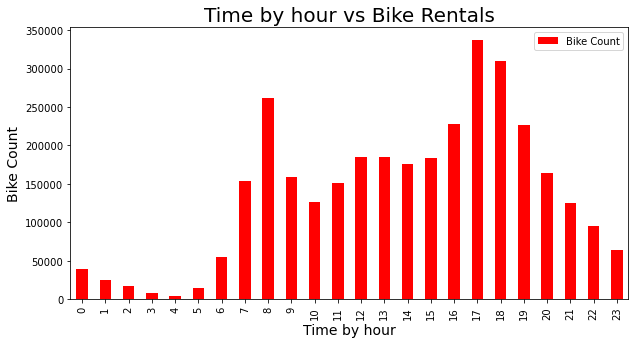

In [20]:
#Plotting the hour of day with Bike Rentals
Bike_Hour_Count_df.plot.bar(figsize=(10,5), color='r',fontsize = 10)
plt.xlabel("Time by hour",fontsize = 14)
plt.ylabel("Bike Count",fontsize = 14)
plt.title("Time by hour vs Bike Rentals",fontsize = 20)
plt.savefig('Output/barplot_Time_by_hour.png', bbox_inches = "tight")
plt.show()

# Seasons vs Bike Rentals

In [21]:
#Adding Season labels
Bike_Share_Season=Bike_Share_Hour.copy()

Bike_Share_Season.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,cnt,Season Name
0,1,2011-01-01,1,0,1,0,0,6,0,1,16,Spring
1,2,2011-01-01,1,0,1,1,0,6,0,1,40,Spring
2,3,2011-01-01,1,0,1,2,0,6,0,1,32,Spring
3,4,2011-01-01,1,0,1,3,0,6,0,1,13,Spring
4,5,2011-01-01,1,0,1,4,0,6,0,1,1,Spring


# Calculating number of bike rentals per season

In [41]:
Bike_Season_Count=Bike_Share_Season.groupby(['season','Season Name']).sum()['cnt']
Bike_Season_Count_df=pd.DataFrame({'Bike Count':Bike_Season_Count})
Bike_Season_Count_df

,,Bike Count
season,Season Name,
1,Spring,471348
2,Summer,918589
3,Fall,1061129
4,Winter,841613


In [26]:
#For TTest
Bike_df=Bike_Share_Season.groupby(Bike_Share_Season['season']).sum()['cnt']
Bike_df=pd.DataFrame({'Bike Count':Bike_df})
Bike_df=Bike_df.reset_index()
Bike_df

,season,Bike Count
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


In [27]:
#Checking for the season with minimum Bike Rentals
Bike_Season_Count_df.loc[Bike_Season_Count_df['Bike Count']==Bike_Season_Count_df['Bike Count'].min()]

,Bike Count
Season Name,
Spring,471348


In [28]:
#Checking for the season with maximum Bike Rentals
Bike_Season_Count_df.loc[Bike_Season_Count_df['Bike Count']==Bike_Season_Count_df['Bike Count'].max()]

,Bike Count
Season Name,
Fall,1061129


# Bar chart

In [42]:
#Plotting the bike rental count per season
Bike_Season_Count_df

,,Bike Count
season,Season Name,
1,Spring,471348
2,Summer,918589
3,Fall,1061129
4,Winter,841613


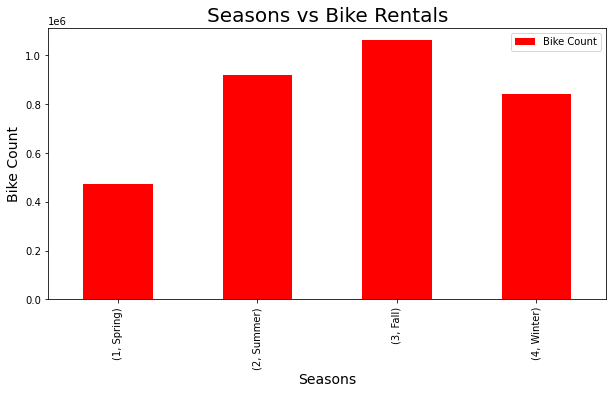

In [43]:
Bike_Season_Count_df.plot.bar(figsize=(10,5), color='r',fontsize = 10)
plt.xlabel("Seasons",fontsize = 14)
plt.ylabel("Bike Count",fontsize = 14)
plt.title("Seasons vs Bike Rentals",fontsize = 20)
plt.savefig('Output/barplot_Seasons.png', bbox_inches = "tight")
plt.show()

In [44]:
#Chisquared test
#st.ttest_ind(Bike_df['season'],Bike_df['Bike Count'],equal_var=False)
observed = pd.Series([471348, 918589, 1061129, 841613], index=["1", "2", "3", "4"])

# Create a data frame
df = pd.DataFrame([observed]).T

# Add a column whose default values are the expected values
df[3] = 823169

# Rename the columns
df.columns = ["observed", "expected"]

# View the data frame
df

,observed,expected
1,471348,823169
2,918589,823169
3,1061129,823169
4,841613,823169


In [45]:
criticalvalue=st.chi2.ppf(q=.95,df=3)
criticalvalue

7.814727903251179

In [46]:
st.chisquare(df['observed'],df['expected'])

Power_divergenceResult(statistic=230630.81235687932, pvalue=0.0)

# Weather patterns vs Bike Rentals

In [65]:
#Amber

# Weekday versus Weekend  Bike Rentals

In [ ]:
#Aurelian

# Holiday vs Bike Rentals

In [ ]:
#Aurelian